Image Classification Project <br>
Data on natural scenes, using NN to predict what type of scene the picture is <br>
https://www.kaggle.com/datasets/puneet6060/intel-image-classification?resource=download

There are 6 categories / types of scenes.<br>
25k images in total. 14k in training, 3k in testing, 7k in predicting sets.<br>
Each image is 150 pixels x 150 pixels.

Buildings - 0<br>
Forest - 1<br>
Glacier - 2<br>
Mountain - 3<br>
Sea - 4<br>
Street - 5

Steps ISBE<br>
I - Inspect data<br>
S - Select features<br>
B - Build and train the model<br>
E - Evaluate the model

In [8]:
# boilerplate imports
import pandas as pd
import numpy as np

#the import classifers 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics contain the plot_confustion_matrix and classification_report
from sklearn import metrics

# helper fuction to splitting data
from sklearn.model_selection import train_test_split

# plotting
import matplotlib.pyplot as plt

import pathlib
%matplotlib inline 

import os
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
import cv2 #had to install with pip
from sklearn.utils import shuffle

In [12]:
# Inspect data
train_path = 'C:/Users/Cenzo Oh/datascience/data-science/Week-13-Presentations/Image_Classification/seg_train/' #grab the path of training images
data_dir = pathlib.Path(train_path)
data_dir

test_path = 'C:/Users/Cenzo Oh/datascience/data-science/Week-13-Presentations/Image_Classification/seg_test/'


In [6]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [24]:
# training data
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split = 0.2, #20%
    subset = "training",
    seed = 321,
    image_size=(132, 132),
    batch_size = 32
)
print()
# Found 14034 files belonging to 6 classes.
# Using 11228 files for training.

# validaton data
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split = 0.2, 
    subset = "validation",
    seed = 321,
    image_size=(132, 132),
    batch_size = 32
)
print()
# Found 14034 files belonging to 6 classes.
# Using 2806 files for validation.

# test data
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    seed = 321,
    image_size=(132, 132),
    batch_size = 32
)
print()
# Found 3000 files belonging to 6 classes.

Found 14034 files belonging to 6 classes.
Using 11228 files for training.

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.

Found 3000 files belonging to 6 classes.



In [25]:
#optimize pipeline performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
# label count
labels = os.listdir(data_dir) #importing labels from training set
count = {}
for i in labels:
    count[i] = len(list(data_dir.glob(f'{i}/*.jpg')))
# for every label / category, count total amount of images

pd.DataFrame(count, index = [0])

# buildings	forest	glacier	mountain	sea	    street
# 2191	    2271	2404	2512	    2274	2382
# pretty even spread of data

,buildings,forest,glacier,mountain,sea,street
0,2191,2271,2404,2512,2274,2382


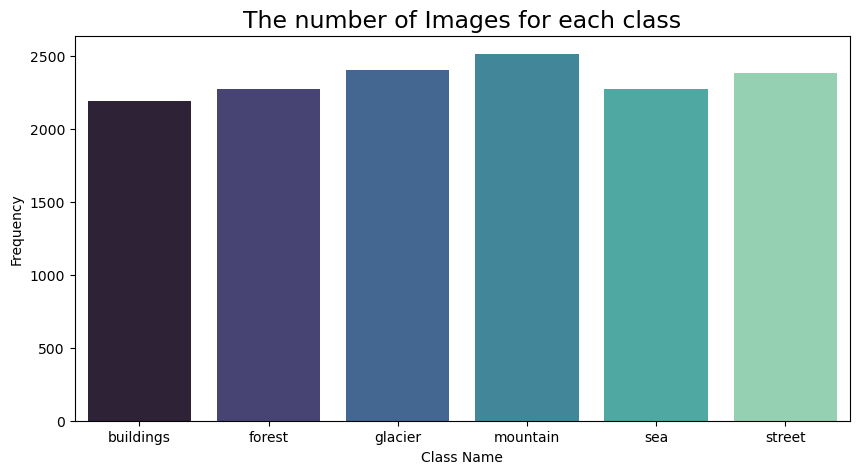

In [32]:
# test plot
y = [values for values in count.values()]
plt.figure(figsize = (10,5))
sns.barplot(x = labels, y = y, palette = 'mako')
plt.title('The number of Images for each class', fontsize = 17)
plt.xlabel('Class Name')
plt.ylabel('Frequency')
plt.show()

In [3]:
# TRYING ANOTHER VERSION
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest'] #array of what to predict
class_names_label = {class_name:i for i, class_name in enumerate(class_names)} #key and value for prediction values

# {'mountain':  0,
#  'street':    1,
#  'glacier':   2,
#  'buildings': 3,
#  'sea':       4,
#  'forest':    5}

# 6
nb_classes = len(class_names)

nb_classes
class_names_label

6

In [20]:
def load_data():    

    datasets = [
        train_path,
        test_path
        ]

    output = []

    for i in datasets:
        images = []
        labels = []

        print("Loading {}".format(i))

        for folder in os.listdir(i):
            label = class_names_label[folder]

            for file in tqdm(os.listdir(os.path.join(i, folder))):
                img_path = os.path.join(os.path.join(i, folder), file)

                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (150, 150)) #image size 150 by 150

                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [21]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/Cenzo Oh/datascience/data-science/Week-13-Presentations/Image_Classification/seg_train/


100%|██████████| 2382/2382 [00:01<00:00, 2223.59it/s]


Loading C:/Users/Cenzo Oh/datascience/data-science/Week-13-Presentations/Image_Classification/seg_test/


100%|██████████| 501/501 [00:00<00:00, 2246.12it/s]


In [22]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

NameError: name 'shuffle' is not defined